# Rf 3 0 2_Utilfuncs
Multidimensional models: utility functions classes available for use in tailoring of composite (multidimensional) pdfs




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:46 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create observables, parameters
-----------------------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create parameters

In [3]:
a0 = ROOT.RooRealVar("a0", "a0", -1.5, -5, 5)
a1 = ROOT.RooRealVar("a1", "a1", -0.5, -1, 1)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 0.5)

Using RooFormulaVar to tailor pdf
-----------------------------------------------------------------------

Create interpreted function f(y) = a0 - a1*sqrt(10*abs(y))

In [4]:
fy_1 = ROOT.RooFormulaVar(
    "fy_1", "a0-a1*sqrt(10*abs(y))", ROOT.RooArgList(y, a0, a1))

Create gauss(x,f(y),s)

In [5]:
model_1 = ROOT.RooGaussian(
    "model_1", "Gaussian with shifting mean", x, fy_1, sigma)

Using RooPolyVar to tailor pdf
-----------------------------------------------------------------------

Create polynomial function f(y) = a0 + a1*y

In [6]:
fy_2 = ROOT.RooPolyVar("fy_2", "fy_2", y, ROOT.RooArgList(a0, a1))

Create gauss(x,f(y),s)

In [7]:
model_2 = ROOT.RooGaussian(
    "model_2", "Gaussian with shifting mean", x, fy_2, sigma)

Using RooAddition to tailor pdf
-----------------------------------------------------------------------

Create sum function f(y) = a0 + y

In [8]:
fy_3 = ROOT.RooAddition("fy_3", "a0+y", ROOT.RooArgList(a0, y))

Create gauss(x,f(y),s)

In [9]:
model_3 = ROOT.RooGaussian(
    "model_3", "Gaussian with shifting mean", x, fy_3, sigma)

Using RooProduct to tailor pdf
-----------------------------------------------------------------------

Create product function f(y) = a1*y

In [10]:
fy_4 = ROOT.RooProduct("fy_4", "a1*y", ROOT.RooArgList(a1, y))

Create gauss(x,f(y),s)

In [11]:
model_4 = ROOT.RooGaussian(
    "model_4", "Gaussian with shifting mean", x, fy_4, sigma)

Plot all pdfs
----------------------------

Make two-dimensional plots in x vs y

In [12]:
hh_model_1 = model_1.createHistogram("hh_model_1", x, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(50)))
hh_model_2 = model_2.createHistogram("hh_model_2", x, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(50)))
hh_model_3 = model_3.createHistogram("hh_model_3", x, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(50)))
hh_model_4 = model_4.createHistogram("hh_model_4", x, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(50)))
hh_model_1.SetLineColor(ROOT.kBlue)
hh_model_2.SetLineColor(ROOT.kBlue)
hh_model_3.SetLineColor(ROOT.kBlue)
hh_model_4.SetLineColor(ROOT.kBlue)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_1_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_2_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_3_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_4_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make canvas and draw ROOT.RooPlots

In [13]:
c = ROOT.TCanvas("rf302_utilfuncs", "rf302_utilfuncs", 800, 800)
c.Divide(2, 2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.20)
hh_model_1.GetZaxis().SetTitleOffset(2.5)
hh_model_1.Draw("surf")
c.cd(2)
ROOT.gPad.SetLeftMargin(0.20)
hh_model_2.GetZaxis().SetTitleOffset(2.5)
hh_model_2.Draw("surf")
c.cd(3)
ROOT.gPad.SetLeftMargin(0.20)
hh_model_3.GetZaxis().SetTitleOffset(2.5)
hh_model_3.Draw("surf")
c.cd(4)
ROOT.gPad.SetLeftMargin(0.20)
hh_model_4.GetZaxis().SetTitleOffset(2.5)
hh_model_4.Draw("surf")

c.SaveAs("rf302_utilfuncs.png")

Info in <TCanvas::Print>: png file rf302_utilfuncs.png has been created


Draw all canvases 

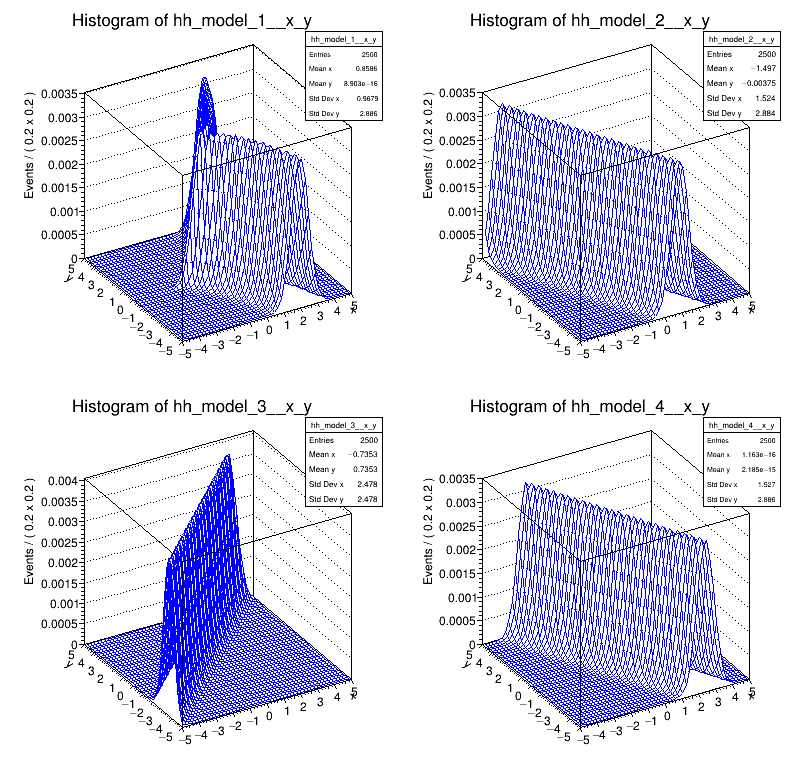

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()